# 체중분류 - 정상체중, 비만(이진분류)

## 분류모델 채택

- (지은)결정트리 - holdout
- (지은)랜덤포레스트 - holdout
- (준희)SVM
- (준희)KNN
- (준희)XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#데이터 불러오기
df = pd.read_csv('body_data2.csv')
df

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중
3,8,23,F004,164.1,137.8,83.2,123.3,100.1,75.4,42.4,...,10.1,7.6,49.4,21.8,F,30,2.5,30,18.344665,정상체중
4,8,23,F005,152.9,127.7,71.1,111.3,93.8,63.3,37.0,...,9.1,7.9,51.9,24.2,F,44,1.5,40,22.199970,정상체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,M498,167.3,141.2,81.4,123.8,98.5,72.4,42.4,...,9.9,7.9,68.0,15.6,M,58,4.3,50,24.295007,정상체중
996,11,30,M499,169.9,143.2,81.3,127.9,97.6,69.1,42.4,...,9.7,8.2,65.2,17.8,M,53,4.5,50,22.587119,정상체중
997,11,29,M500,173.7,145.3,84.6,128.0,101.5,74.8,44.4,...,10.1,8.0,67.2,20.3,M,30,2.9,30,22.272534,정상체중
998,9,28,F339,153.4,127.4,78.6,111.5,92.1,68.0,37.4,...,9.3,7.2,52.1,35.6,F,61,6.7,60,22.140479,비만


In [3]:
#원본-복사본 만들기
df2 = df.copy()
df2

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중
3,8,23,F004,164.1,137.8,83.2,123.3,100.1,75.4,42.4,...,10.1,7.6,49.4,21.8,F,30,2.5,30,18.344665,정상체중
4,8,23,F005,152.9,127.7,71.1,111.3,93.8,63.3,37.0,...,9.1,7.9,51.9,24.2,F,44,1.5,40,22.199970,정상체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,M498,167.3,141.2,81.4,123.8,98.5,72.4,42.4,...,9.9,7.9,68.0,15.6,M,58,4.3,50,24.295007,정상체중
996,11,30,M499,169.9,143.2,81.3,127.9,97.6,69.1,42.4,...,9.7,8.2,65.2,17.8,M,53,4.5,50,22.587119,정상체중
997,11,29,M500,173.7,145.3,84.6,128.0,101.5,74.8,44.4,...,10.1,8.0,67.2,20.3,M,30,2.9,30,22.272534,정상체중
998,9,28,F339,153.4,127.4,78.6,111.5,92.1,68.0,37.4,...,9.3,7.2,52.1,35.6,F,61,6.7,60,22.140479,비만


In [4]:
# 데이터 정보 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   측정월        1000 non-null   int64  
 1   측정일        1000 non-null   int64  
 2   모델번호       1000 non-null   object 
 3   키          1000 non-null   float64
 4   목뒤높이       1000 non-null   float64
 5   엉덩이높이      1000 non-null   float64
 6   겨드랑높이      1000 non-null   float64
 7   허리높이       1000 non-null   float64
 8   샅높이        1000 non-null   float64
 9   무릎높이       1000 non-null   float64
 10  머리둘레       1000 non-null   float64
 11  목둘레        1000 non-null   float64
 12  젖가슴둘레      1000 non-null   float64
 13  허리둘레       1000 non-null   float64
 14  배꼽수준허리둘레   1000 non-null   float64
 15  엉덩이둘레      1000 non-null   float64
 16  넙다리둘레      1000 non-null   float64
 17  무릎둘레       1000 non-null   float64
 18  장딴지둘레      1000 non-null   float64
 19  종아리최소둘레    1000 non-null   float64
 20  발목둘레     

In [5]:
df2.set_index('모델번호', inplace=True)
df2

,측정월,측정일,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
모델번호,,,,,,,,,,,,,,,,,,,,,
F001,8,10,161.4,136.1,80.1,119.8,94.2,73.2,41.6,55.5,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
F002,8,10,168.1,140.4,84.7,123.3,107.0,77.3,45.2,54.7,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
F003,8,10,163.4,138.2,81.9,120.6,97.1,74.8,42.3,52.0,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중
F004,8,23,164.1,137.8,83.2,123.3,100.1,75.4,42.4,56.5,...,10.1,7.6,49.4,21.8,F,30,2.5,30,18.344665,정상체중
F005,8,23,152.9,127.7,71.1,111.3,93.8,63.3,37.0,55.7,...,9.1,7.9,51.9,24.2,F,44,1.5,40,22.199970,정상체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M498,11,30,167.3,141.2,81.4,123.8,98.5,72.4,42.4,54.4,...,9.9,7.9,68.0,15.6,M,58,4.3,50,24.295007,정상체중
M499,11,30,169.9,143.2,81.3,127.9,97.6,69.1,42.4,57.1,...,9.7,8.2,65.2,17.8,M,53,4.5,50,22.587119,정상체중
M500,11,29,173.7,145.3,84.6,128.0,101.5,74.8,44.4,58.2,...,10.1,8.0,67.2,20.3,M,30,2.9,30,22.272534,정상체중


In [6]:
#나이대별 그룹화
df2_by_group = df2.groupby(['나이대','성별']).agg({'키' : 'count', '체지방율':'mean'}).reset_index()
df2_by_group

,나이대,성별,키,체지방율
0,20,F,69,29.088406
1,20,M,80,21.563750
2,30,F,81,27.980247
3,30,M,89,24.475281
4,40,F,91,31.106593
5,40,M,103,24.122330
6,50,F,107,33.566355
7,50,M,108,25.867593
8,60,F,119,34.560504
9,60,M,80,27.145000


In [7]:
#나이대별 여성/남성 분류
df2_by_group_f = df2_by_group[df2_by_group['성별'] =='F']
df2_by_group_m = df2_by_group[df2_by_group['성별'] =='M']
df2_by_group_f, df2_by_group_m

(    나이대 성별    키       체지방율
 0    20  F   69  29.088406
 2    30  F   81  27.980247
 4    40  F   91  31.106593
 6    50  F  107  33.566355
 8    60  F  119  34.560504
 10   70  F   33  35.048485,
     나이대 성별    키       체지방율
 1    20  M   80  21.563750
 3    30  M   89  24.475281
 5    40  M  103  24.122330
 7    50  M  108  25.867593
 9    60  M   80  27.145000
 11   70  M   39  28.338462
 12   80  M    1  34.300000)

In [8]:
#나이대별 여성 인원수/체지방율 분류
df2_by_group_f_count = df2_by_group[df2_by_group['성별'] =='F'][['나이대','키']]
df2_by_group_f_mean = df2_by_group[df2_by_group['성별'] =='F'][['나이대','체지방율']]

In [9]:
#나이대별 남성 인원수/체지방율 분류
df2_by_group_m_count = df2_by_group[df2_by_group['성별'] =='M'][['나이대','키']]
df2_by_group_m_mean = df2_by_group[df2_by_group['성별'] =='M'][['나이대','체지방율']]

### 체지방율 평균과 변화 그래프

Text(0.5, 0, '나이대')

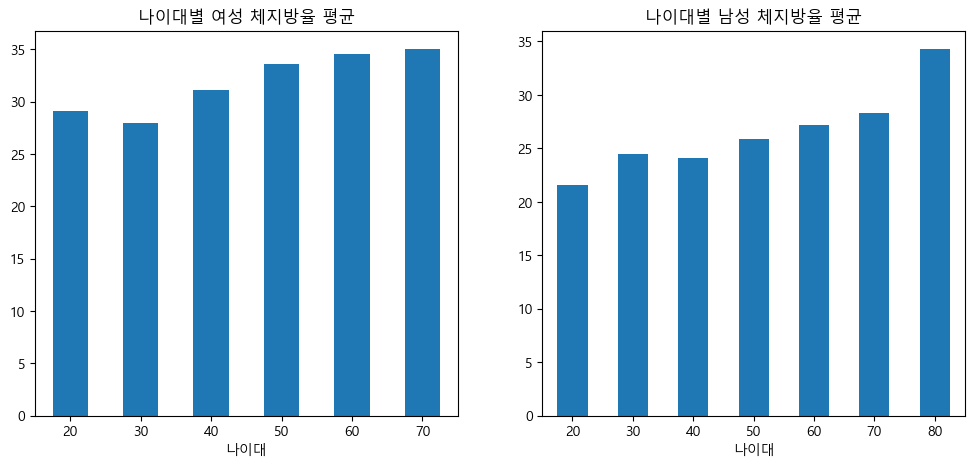

In [10]:
#나이대별 여성/남성 체지방율 평균 그래프
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# subplot 그래프 나란히 보기
fig, axes = plt.subplots(1, 2, figsize=(12,5))


df2_by_group_f_mean.plot(kind='bar',  ax=axes[0], x='나이대', y='체지방율', legend=False)
axes[0].set_title('나이대별 여성 체지방율 평균')
axes[0].set_xticklabels(['20', '30', '40', '50', '60', '70'], rotation=360)
axes[0].set_xlabel('나이대') # x축 레이블 추가
#axes[0].set_ylabel('인원수') # y축 레이블 추가

df2_by_group_m_mean.plot(kind='bar', ax=axes[1], x='나이대', y='체지방율', legend=False)
axes[1].set_title('나이대별 남성 체지방율 평균')
axes[1].set_xticklabels(['20', '30', '40', '50', '60', '70', '80'], rotation=360)
axes[1].set_xlabel('나이대') # x축 레이블 추가
#axes[1].set_ylabel('인원수') # y축 레이블 추가

In [11]:
# 그래프에 데이터 수치값 넣어주기 위해 인덱스 정렬
df2_by_group_f.reset_index(inplace=True)
df2_by_group_m.reset_index(inplace=True)
df2_by_group_f, df2_by_group_m

(   index  나이대 성별    키       체지방율
 0      0   20  F   69  29.088406
 1      2   30  F   81  27.980247
 2      4   40  F   91  31.106593
 3      6   50  F  107  33.566355
 4      8   60  F  119  34.560504
 5     10   70  F   33  35.048485,
    index  나이대 성별    키       체지방율
 0      1   20  M   80  21.563750
 1      3   30  M   89  24.475281
 2      5   40  M  103  24.122330
 3      7   50  M  108  25.867593
 4      9   60  M   80  27.145000
 5     11   70  M   39  28.338462
 6     12   80  M    1  34.300000)

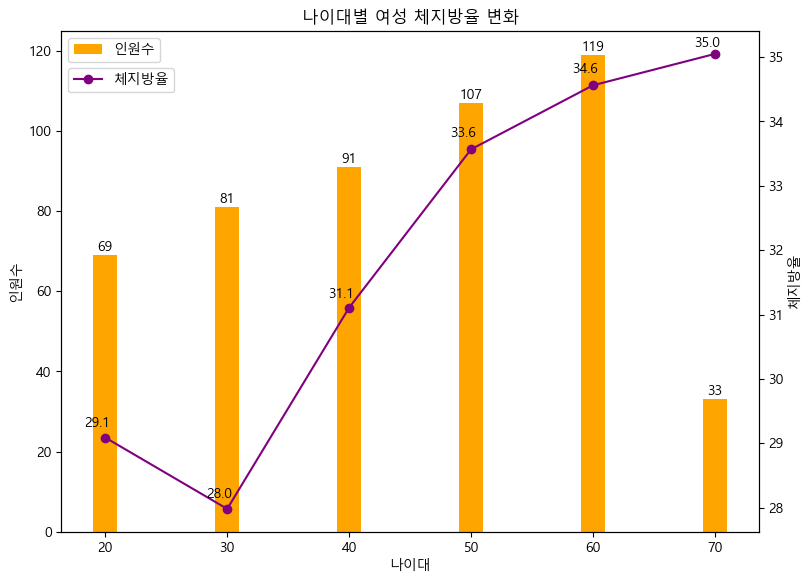

In [12]:
# 나이대별 인원수와 체지방율 변화 그래프(여성)
fig, ax1 = plt.subplots(figsize=(9, 6.5))

# 막대 그래프 그리기
ax1.bar(df2_by_group_f['나이대'], df2_by_group_f['키'], color='orange', width=2)
ax1.set_ylabel('인원수')
ax1.set_xlabel('나이대')

# 라인 그래프 그리기
ax2 = ax1.twinx()
ax2.plot(df2_by_group_f['나이대'], df2_by_group_f['체지방율'], color='purple', marker='o')
ax2.set_ylabel('체지방율')


# 그래프 제목 설정
plt.title('나이대별 여성 체지방율 변화')

# 범례 추가
ax1.legend(['인원수'], loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(['체지방율'], loc='upper left', bbox_to_anchor=(0, 0.94))

# 막대 그래프에 수치 넣기
for i, val in enumerate(df2_by_group_f['키']):
    ax1.annotate(str(val), (df2_by_group_f['나이대'][i], val), xytext=(0, 3), textcoords='offset points', ha='center')
    
# 라인 그래프에 수치 넣기
for i, val in enumerate(df2_by_group_f['체지방율']):
    rounded_val = round(val, 1)  # 첫째 자리까지 반올림한 수치 계산
    ax2.annotate(str(rounded_val), (df2_by_group_f['나이대'][i], rounded_val), xytext=(-6, 5)
                                         , textcoords='offset points', ha='center', color='black', va='bottom')
    


plt.show()

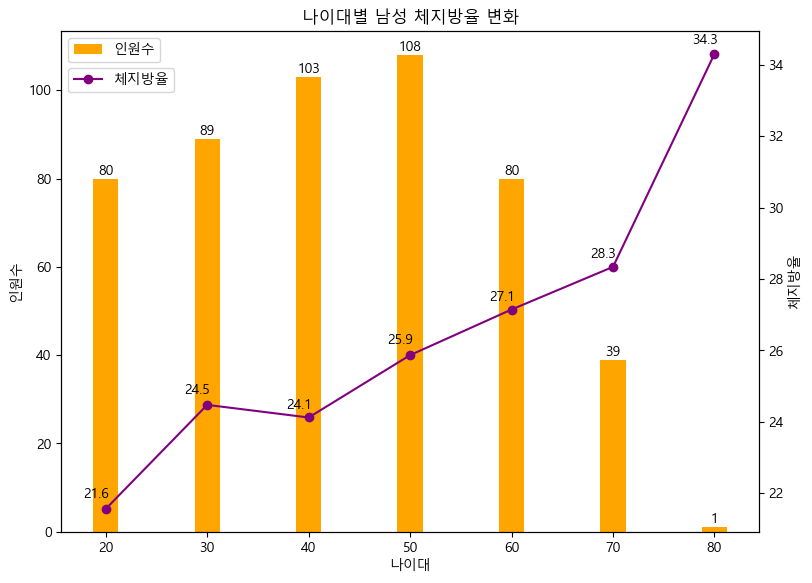

In [13]:
# 나이대별 인원수와 체지방율 변화 그래프(남성)
fig, ax1 = plt.subplots(figsize=(9, 6.5))

# 막대 그래프 그리기
ax1.bar(df2_by_group_m['나이대'], df2_by_group_m['키'], color='orange', width=2.5)
ax1.set_ylabel('인원수')
ax1.set_xlabel('나이대')

# 라인 그래프 그리기
ax2 = ax1.twinx()
ax2.plot(df2_by_group_m['나이대'], df2_by_group_m['체지방율'], color='purple', marker='o')
ax2.set_ylabel('체지방율')

# 그래프 제목 설정
plt.title('나이대별 남성 체지방율 변화')

# 범례 추가
ax1.legend(['인원수'], loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(['체지방율'], loc='upper left', bbox_to_anchor=(0, 0.94))

# 막대 그래프에 수치 넣기
for i, val in enumerate(df2_by_group_m['키']):
    ax1.annotate(str(val), (df2_by_group_m['나이대'][i], val), xytext=(0, 3), textcoords='offset points', ha='center')
    
# 라인 그래프에 수치 넣기
for i, val in enumerate(df2_by_group_m['체지방율']):
    rounded_val = round(val, 1)  # 첫째 자리까지 반올림한 수치 계산
    ax2.annotate(str(rounded_val), (df2_by_group_m['나이대'][i], rounded_val), xytext=(-7, 5)
                                         , textcoords='offset points', ha='center', color='black', va='bottom')

plt.show()

## 결정 트리(Decision Tree)
1. 데이터 수집 및 전처리
2. 데이터 분할 : 학습 데이터와 테스트 데이터로 분할
3. 모델 학습 : fit 메서드 사용
4. 모델 예측
5. 모델 평가 : 정확도, 정밀도, 재현율, F1 점수 등

**분류모델 성능 평가 주요 지표**
1. 정확도 (Accuracy):
- 정확도는 전체 예측 중 올바르게 분류된 샘플의 비율
- 정확도 = (올바르게 분류된 샘플 수) / (전체 예측한 샘플 수)
- 데이터의 클래스 분포가 균형을 이루고 있을 때 적합한 지표. 그러나 데이터의 불균형이 심한 경우 정확도는 오용될 수 있다.

2. 정밀도 (Precision):
- 정밀도는 양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율
- 정밀도 = (양성으로 올바르게 분류된 샘플 수) / (양성으로 예측한 샘플 수)
- 거짓 양성(FP)을 최소화하는 것이 목표일 때 사용

3. 재현율 (Recall):
- 재현율은 실제 양성인 샘플 중 양성으로 예측한 샘플의 비율
- 재현율 = (양성으로 올바르게 분류된 샘플 수) / (실제 양성인 샘플 수)
- 거짓 음성(FN)을 최소화하는 것이 목표일 때 사용합니다. 즉, 실제로 중요한 샘플을 놓치지 않는 것이 중요할 때 유용

4. F1 점수 (F1 Score):
- F1 점수는 정밀도와 재현율의 조화 평균으로 계산되는 지표
- F1 점수 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
- 정밀도와 재현율을 모두 고려하는 지표로, 불균형한 클래스 분포에서 모델의 성능을 평가할 때 유용

### 원 핫 인코딩

In [14]:
# object 타입의 특징을 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['성별', '체중분류']
data_categorical = df2[categorical_features]
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_categorical)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))
df2.reset_index(drop=True, inplace=True) # 인덱스 재설정
encoded_df.reset_index(drop=True, inplace=True) # 인덱스 재설정
data_encoded = pd.concat([df2, encoded_df], axis=1) 
data_encoded

,측정월,측정일,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,...,성별,나이,신발굽높이,나이대,BMI,체중분류,성별_F,성별_M,체중분류_비만,체중분류_정상체중
0,8,10,161.4,136.1,80.1,119.8,94.2,73.2,41.6,55.5,...,F,37,7.8,30,24.145910,비만,1.0,0.0,1.0,0.0
1,8,10,168.1,140.4,84.7,123.3,107.0,77.3,45.2,54.7,...,F,26,2.7,20,19.853059,비만,1.0,0.0,1.0,0.0
2,8,10,163.4,138.2,81.9,120.6,97.1,74.8,42.3,52.0,...,F,39,8.0,30,19.925422,정상체중,1.0,0.0,0.0,1.0
3,8,23,164.1,137.8,83.2,123.3,100.1,75.4,42.4,56.5,...,F,30,2.5,30,18.344665,정상체중,1.0,0.0,0.0,1.0
4,8,23,152.9,127.7,71.1,111.3,93.8,63.3,37.0,55.7,...,F,44,1.5,40,22.199970,정상체중,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,167.3,141.2,81.4,123.8,98.5,72.4,42.4,54.4,...,M,58,4.3,50,24.295007,정상체중,0.0,1.0,0.0,1.0
996,11,30,169.9,143.2,81.3,127.9,97.6,69.1,42.4,57.1,...,M,53,4.5,50,22.587119,정상체중,0.0,1.0,0.0,1.0
997,11,29,173.7,145.3,84.6,128.0,101.5,74.8,44.4,58.2,...,M,30,2.9,30,22.272534,정상체중,0.0,1.0,0.0,1.0
998,9,28,153.4,127.4,78.6,111.5,92.1,68.0,37.4,54.3,...,F,61,6.7,60,22.140479,비만,1.0,0.0,1.0,0.0


### DecisionTree - 우리가 생각한 최적화 피처

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score

features = ['젖가슴둘레', '허리둘레', '넙다리둘레', '엉덩이둘레', '성별_F']

#입력 데이터, 타겟 데이터 분리
X = data_encoded[features]
y = data_encoded['체중분류_비만']

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#테스트 데이터로 예측
y_pred = model.predict(X_test)

#모델 성능 평가
accuracy = model.score(X_test, y_test)

# 결과 출력
print("정확도:", accuracy)

# 정밀도를 계산합니다.
precision = precision_score(y_test, y_pred, average='weighted')
print("정밀도:", precision)

# 재현율을 계산합니다.
recall = recall_score(y_test, y_pred, average='weighted')
print("재현율:", recall)

# F1 점수를 계산합니다.
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 점수:", f1)


# # AUC 점수를 계산합니다. : 다중 클래스에서 multi_class must be in ('ovo', 'ovr') 를 추가해야 하는데 DecisionTreeClassifier() 에는 적용 불가
# auc = roc_auc_score(y_test, y_scores)
# print("AUC 점수:", auc)

정확도: 0.695
정밀도: 0.6924020694752403
재현율: 0.695
F1 점수: 0.6928360924140441


### DecisionTree - 처음 생각한 최적화 피처 찾기 : SequentialFeatureSelector(SFS) 'best'

In [16]:
data_encoded

,측정월,측정일,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,...,성별,나이,신발굽높이,나이대,BMI,체중분류,성별_F,성별_M,체중분류_비만,체중분류_정상체중
0,8,10,161.4,136.1,80.1,119.8,94.2,73.2,41.6,55.5,...,F,37,7.8,30,24.145910,비만,1.0,0.0,1.0,0.0
1,8,10,168.1,140.4,84.7,123.3,107.0,77.3,45.2,54.7,...,F,26,2.7,20,19.853059,비만,1.0,0.0,1.0,0.0
2,8,10,163.4,138.2,81.9,120.6,97.1,74.8,42.3,52.0,...,F,39,8.0,30,19.925422,정상체중,1.0,0.0,0.0,1.0
3,8,23,164.1,137.8,83.2,123.3,100.1,75.4,42.4,56.5,...,F,30,2.5,30,18.344665,정상체중,1.0,0.0,0.0,1.0
4,8,23,152.9,127.7,71.1,111.3,93.8,63.3,37.0,55.7,...,F,44,1.5,40,22.199970,정상체중,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,167.3,141.2,81.4,123.8,98.5,72.4,42.4,54.4,...,M,58,4.3,50,24.295007,정상체중,0.0,1.0,0.0,1.0
996,11,30,169.9,143.2,81.3,127.9,97.6,69.1,42.4,57.1,...,M,53,4.5,50,22.587119,정상체중,0.0,1.0,0.0,1.0
997,11,29,173.7,145.3,84.6,128.0,101.5,74.8,44.4,58.2,...,M,30,2.9,30,22.272534,정상체중,0.0,1.0,0.0,1.0
998,9,28,153.4,127.4,78.6,111.5,92.1,68.0,37.4,54.3,...,F,61,6.7,60,22.140479,비만,1.0,0.0,1.0,0.0


In [17]:
!pip install mlxtend

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X = data_encoded.drop(columns=['측정월', '측정일', 'BMI', '체중분류', '성별'
                               ,'체중분류_정상체중', '체중분류_비만'])
y = data_encoded['체중분류_비만']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)

sfs = SFS(classifier,
          k_features='best',
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.3s finished

[2024-02-18 20:16:09] Features: 1/39 -- score: 0.8400000000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.3s finished

[2024-02-18 20:16:10] Features: 2/39 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.3s finished

[2024-02-18 20:16:10] Features: 3/39 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2024-02-18 20:16:20] Features: 30/39 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2024-02-18 20:16:21] Features: 31/39 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2024-02-18 20:16:21] Features: 32/39 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2024-02-18 20:16:21] Features: 33/39 -- score: 1.0[Parallel(n_jobs=1)]: Using b

In [124]:
selected_features = list(sfs.k_feature_names_)
selected_features

['체지방율', '성별_F']

### DecisionTree - SFS 함수로 추출된 최적화 피처

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score

# features = ['엉덩이높이', '목둘레', '무릎둘레', '위팔길이']
features = ['체지방율', '성별_F']
#입력 데이터, 타겟 데이터 분리
X = data_encoded[features]
y = data_encoded['체중분류_비만']

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#테스트 데이터로 예측
y_pred = model.predict(X_test)

#모델 성능 평가
accuracy2 = model.score(X_test, y_test)

# 결과 출력
print("정확도:", accuracy2)

# 정밀도를 계산합니다.
precision2 = precision_score(y_test, y_pred, average='weighted')
print("정밀도:", precision2)

# 재현율을 계산합니다.
recall2 = recall_score(y_test, y_pred, average='weighted')
print("재현율:", recall2)

# F1 점수를 계산합니다.
f12 = f1_score(y_test, y_pred, average='weighted')
print("F1 점수:", f12)

정확도: 1.0
정밀도: 1.0
재현율: 1.0
F1 점수: 1.0


**데이터 전처리 과정에서 체지방율을 가지고 체중을 분류했기 때문에 best 피처 중 체지방율을 입력하면 당연히 점수가 잘 나올 수 밖에 없고 그렇게 하면 안 된다. 체지방율, 몸무게 컬럼도 제외한 후 다시 학습 진행**

### DecisionTree - 체지방율, 몸무게, BMI 빼고 최적화 피처 찾기
**(중요도 상위 5개 추출을 위해  k_features=5 로 수정)**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X = data_encoded.drop(columns=['측정월', '측정일', 'BMI', '체중분류', '성별'
                               , '체중분류_정상체중', '체중분류_비만'
                               , '체지방율', '몸무게'])
y = data_encoded['체중분류_비만']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)

sfs = SFS(classifier,
          k_features=5,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train, y_train)

# # best 중에서 5개의 피처만 추출
# best_features = list(sfs.subsets_[5]['feature_idx'])
# X_train_best = X_train.iloc[:, best_features]
# X_test_best = X_test.iloc[:, best_features]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.2s finished

[2024-02-20 16:04:46] Features: 1/5 -- score: 0.7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.3s finished

[2024-02-20 16:04:46] Features: 2/5 -- score: 0.7275[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished

[2024-02-20 16:04:47] Features: 3/5 -- score: 0.75625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remainin

In [73]:
selected_features = list(sfs.k_feature_names_)
print(selected_features)

['키', '배꼽수준허리둘레', '넙다리둘레', '팔길이', '나이대']


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score

#features = ['키', '허리둘레', '배꼽수준허리둘레', '넙다리둘레','손안쪽가쪽직선길이']
features = ['키', '배꼽수준허리둘레', '넙다리둘레', '팔길이', '나이대']
#입력 데이터, 타겟 데이터 분리
X = data_encoded[features]
y = data_encoded['체중분류_비만']

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#테스트 데이터로 예측
y_pred = model.predict(X_test)

#모델 성능 평가
accuracy3 = model.score(X_test, y_test)

# 결과 출력
print("정확도:", accuracy3)

# 정밀도를 계산합니다.
precision3 = precision_score(y_test, y_pred, average='weighted')
print("정밀도:", precision3)

# 재현율을 계산합니다.
recall3 = recall_score(y_test, y_pred, average='weighted')
print("재현율:", recall3)

# F1 점수를 계산합니다.
f13 = f1_score(y_test, y_pred, average='weighted')
print("F1 점수:", f13)

정확도: 0.715
정밀도: 0.7192801693719124
재현율: 0.715
F1 점수: 0.7162666666666666


**우리가 생각한 입력 변수 ['젖가슴둘레', '허리둘레', '넙다리둘레', '엉덩이둘레', '성별_F'] 보다 <br>
SFS 함수로 추출된 입력 변수 ['키', '배꼽수준허리둘레', '넙다리둘레', '팔길이', '나이대'] 가 더 좋은 성능의 점수를 보여주었다.**

### DecisionTree 성능지표 비교 시각화

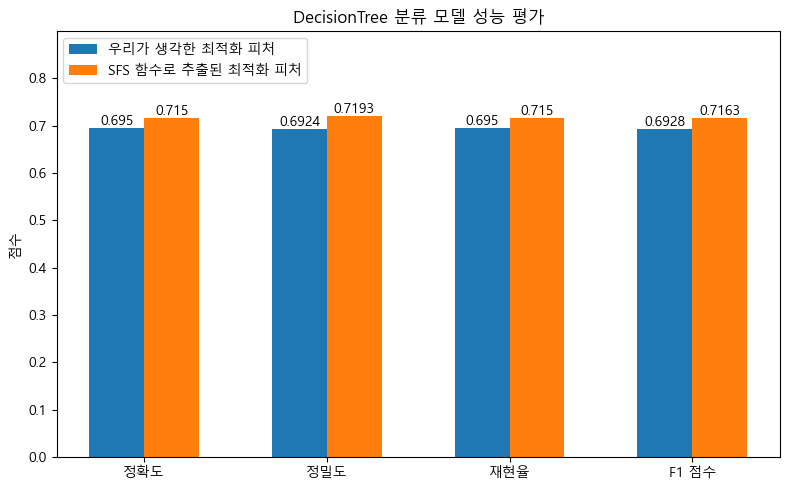

In [20]:
# 성능 지표
metrics = ['정확도', '정밀도', '재현율', 'F1 점수']
scores = [accuracy, precision, recall, f1]
scores3 = [accuracy3, precision3, recall3, f13]

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(metrics))
width = 0.3

# 첫 번째 그래프 그리기
rects1 = ax.bar(x - width/2, scores, width, label='우리가 생각한 최적화 피처')
# 두 번째 그래프 그리기
rects2 = ax.bar(x + width/2, scores3, width, label='SFS 함수로 추출된 최적화 피처')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('점수')
ax.set_title('DecisionTree 분류 모델 성능 평가')
ax.legend()

# 범례 위치 설정
ax.legend(loc='upper left')

# 그래프에 점수 표시
for rects in [rects1, rects2]:
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, str(round(height, 4)), ha='center', va='bottom')

# y축 범위 설정
ax.set_ylim(top=max(max(scores), max(scores3)) * 1.25)  # 최대값의 12.5% 여유 공간 추가
plt.tight_layout()
plt.show()

## RandomForest
1. 데이터 수집 및 전처리
2. 데이터 분할 : 학습 데이터와 테스트 데이터로 분할
3. 모델 생성 : scikit-learn 라이브러리 사용
4. 모델 학습 : fit 함수 사용
5. 모델 예측 : predict() 함수 사용
6. 모델 평가 : 정확도, 정밀도, 재현율, F1 점수 등

### RandomForest - 우리가 생각한 최적화 피처

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score

features = ['젖가슴둘레', '허리둘레', '넙다리둘레', '엉덩이둘레', '성별_F']

# 입력 데이터, 타겟 데이터 분리
X = data_encoded[features]
y = data_encoded['체중분류_비만']

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = model.score(X_test, y_test)

# 결과 출력
print("정확도:", accuracy)

# 정밀도를 계산합니다.
precision = precision_score(y_test, y_pred, average='weighted')
print("정밀도:", precision)

# 재현율을 계산합니다.
recall = recall_score(y_test, y_pred, average='weighted')
print("재현율:", recall)

# F1 점수를 계산합니다.
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 점수:", f1)

정확도: 0.77
정밀도: 0.7689166666666667
재현율: 0.77
F1 점수: 0.7691442744935924


### RandomForest - 최적화 피처 찾기 SFS 'best'

In [84]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

X = data_encoded.drop(columns=['측정월', '측정일', 'BMI', '체중분류', '성별'
                               , '체중분류_정상체중', '체중분류_비만'])
y = data_encoded['체중분류_비만']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

sfs = SFS(classifier,
         k_features='best',
         forward=True,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=5)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   19.1s finished

[2024-02-20 16:08:17] Features: 1/39 -- score: 0.85375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   17.1s finished

[2024-02-20 16:08:34] Features: 2/39 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   14.4s finished

[2024-02-20 16:08:49] Features: 3/39 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remainin

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   10.3s finished

[2024-02-20 16:15:53] Features: 29/39 -- score: 0.99[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.5s finished

[2024-02-20 16:16:03] Features: 30/39 -- score: 0.9875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.5s finished

[2024-02-20 16:16:11] Features: 31/39 -- score: 0.9887499999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.6s finished

[2024-02-20 16:16:19] Features: 32/39 -- score: 0.98375[Paral

In [85]:
selected_features = list(sfs.k_feature_names_)
selected_features

['체지방율', '성별_F']

### RandomForest - SFS 함수로 추출된 최적화 피처

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score

features = ['체지방율', '성별_F']
#features = ['발목둘레', '어깨사이너비', '체지방율', '나이대']

# 입력 데이터, 타겟 데이터 분리
X = data_encoded[features]
y = data_encoded['체중분류_비만']

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy2 = model.score(X_test, y_test)

# 결과 출력
print("정확도:", accuracy2)

# 정밀도를 계산합니다.
precision2 = precision_score(y_test, y_pred, average='weighted')
print("정밀도:", precision2)

# 재현율을 계산합니다.
recall2 = recall_score(y_test, y_pred, average='weighted')
print("재현율:", recall2)

# F1 점수를 계산합니다.
f12 = f1_score(y_test, y_pred, average='weighted')
print("F1 점수:", f12)

정확도: 1.0
정밀도: 1.0
재현율: 1.0
F1 점수: 1.0


**데이터 전처리 과정에서 체지방율을 가지고 체중을 분류했기 때문에 best 피처 중 체지방율을 입력하면 당연히 점수가 잘 나올 수 밖에 없고 그렇게 하면 안 된다. 체지방율, 몸무게 컬럼도 제외한 후 다시 학습 진행**

### RandomForest - 체지방율, 몸무게, BMI 빼고 최적화 피처 찾기
**(중요도 상위 5개 추출을 위해  k_features=5 로 수정)**

In [87]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

X = data_encoded.drop(columns=['측정월', '측정일', 'BMI', '체중분류', '성별'
                               , '체중분류_정상체중', '체중분류_비만'
                               , '체지방율', '몸무게'])
y = data_encoded['체중분류_비만']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

sfs = SFS(classifier,
         k_features=5,
         forward=True,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=5)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   18.7s finished

[2024-02-20 16:18:35] Features: 1/5 -- score: 0.7175[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   22.8s finished

[2024-02-20 16:18:58] Features: 2/5 -- score: 0.76[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   21.5s finished

[2024-02-20 16:19:19] Features: 3/5 -- score: 0.78625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaini

In [88]:
selected_features = list(sfs.k_feature_names_)  # 선택된 피처의 이름 리스트
print("선택된 피처:")
print(selected_features)

선택된 피처:
['배꼽수준허리둘레', '발목둘레', '편팔꿈치둘레', '손직선길이', '신발굽높이']


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score

#features = ['키', '허리둘레', '배꼽수준허리둘레', '넙다리둘레','손안쪽가쪽직선길이']
features = ['배꼽수준허리둘레', '발목둘레', '편팔꿈치둘레', '손직선길이', '신발굽높이']

# 입력 데이터, 타겟 데이터 분리
X = data_encoded[features]
y = data_encoded['체중분류_비만']

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy3 = model.score(X_test, y_test)

# 결과 출력
print("정확도:", accuracy3)

# 정밀도를 계산합니다.
precision3 = precision_score(y_test, y_pred, average='weighted')
print("정밀도:", precision3)

# 재현율을 계산합니다.
recall3 = recall_score(y_test, y_pred, average='weighted')
print("재현율:", recall3)

# F1 점수를 계산합니다.
f13 = f1_score(y_test, y_pred, average='weighted')
print("F1 점수:", f13)

정확도: 0.805
정밀도: 0.80735094645207
재현율: 0.805
F1 점수: 0.8056703419826334


**우리가 생각한 입력 변수 ['젖가슴둘레', '허리둘레', '넙다리둘레', '엉덩이둘레', '성별_F'] 보다 <br>
SFS 함수로 추출된 입력 변수 ['배꼽수준허리둘레', '발목둘레', '편팔꿈치둘레', '손직선길이', '신발굽높이'] 가 더 좋은 성능의 점수를 보여주었다.**

### RandomForest 성능지표 비교 시각화

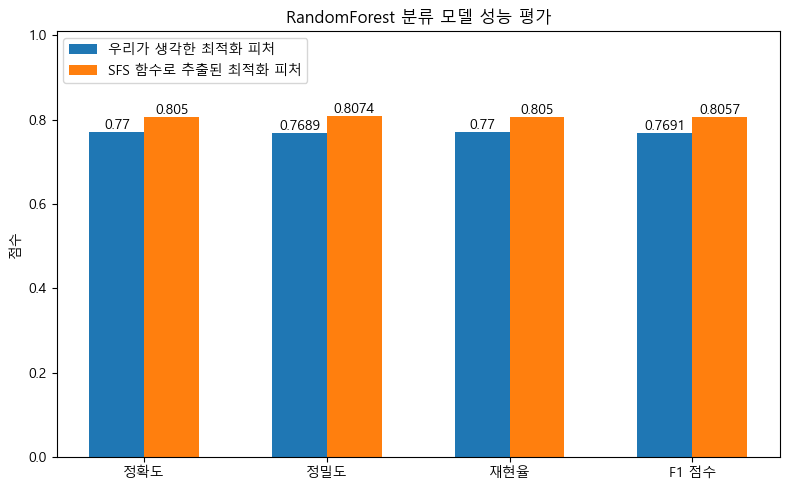

In [25]:
# 성능 지표
metrics = ['정확도', '정밀도', '재현율', 'F1 점수']
scores = [accuracy, precision, recall, f1]
scores3 = [accuracy3, precision3, recall3, f13]

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(metrics))
width = 0.3

# 첫 번째 그래프 그리기
rects1 = ax.bar(x - width/2, scores, width, label='우리가 생각한 최적화 피처')
# 두 번째 그래프 그리기
rects2 = ax.bar(x + width/2, scores3, width, label='SFS 함수로 추출된 최적화 피처')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('점수')
ax.set_title('RandomForest 분류 모델 성능 평가')
ax.legend()

# 범례 위치 설정
ax.legend(loc='upper left')

# 그래프에 점수 표시
for rects in [rects1, rects2]:
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, str(round(height, 4)), ha='center', va='bottom')

# y축 범위 설정
ax.set_ylim(top=max(max(scores), max(scores3)) * 1.25)  # 최대값의 12.5% 여유 공간 추가

plt.tight_layout()
plt.show()